In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [4]:
#read the data set
digits = pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
#head
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
four = digits.iloc[3,1:]
four.shape

(784,)

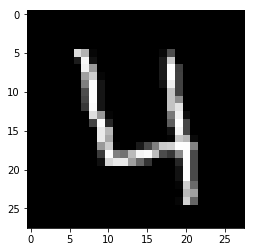

In [13]:
four= four.values.reshape(28,28)
plt.imshow(four,cmap='gray')

In [14]:
#visuallise the array
print(four[5:-5,5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [15]:
#counts of lables to see how mny labels are there in each digit
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
#summary count in terms of percentage
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [17]:
#missings values
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [18]:
#avearage values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Data Prep. for Model Building

In [19]:
#creating training and test sets
#splitting the data into train and test
X= digits.iloc[:,1:]
Y=digits.iloc[:,0]

#rescaling the feature
from sklearn.preprocessing import scale
X = scale(X)

#train test split with train 70% and test size of 30%
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.70, random_state=100)

#print
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(29399, 784)
(12601, 784)
(29399,)
(12601,)


In [20]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Building

In [19]:
from sklearn import svm
from sklearn import metrics

#rbf kernerl with other default hyperparameters 
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)

C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
#predict
predictions = svm_rbf.predict(x_test)

#accuracy
print(metrics.accuracy_score(y_true=y_test, y_pred=predictions))

0.956193952860884


In [21]:
gc.collect()

14

In [22]:
#grid search cross validation to find the optimal values
#of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters ={
            'C': [1.10,100],
            'gamma': [1e-2,1e-3,1e-4]
            }

#instantiate a model
svc_grid_search = svm.SVC(kernel='rbf')

#create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search,param_grid=parameters,scoring='accuracy')

#fit
clf.fit(x_train,y_train)

C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.1, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
#results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SHAITENDER.SINGH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_scor

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,654.593774,3.713241,145.327312,4.165774,1.1,0.01,"{'C': 1.1, 'gamma': 0.01}",0.803958,0.804858,0.813004,0.807272,0.004069,6,0.999796,0.999796,0.999643,0.999745,0.000072
1,100.893771,0.122023,66.220788,0.531679,1.1,0.001,"{'C': 1.1, 'gamma': 0.001}",0.948796,0.953256,0.949576,0.950543,0.001945,2,0.978464,0.978266,0.977961,0.978231,0.000207
2,139.584650,0.275305,92.568295,0.118213,1.1,0.0001,"{'C': 1.1, 'gamma': 0.0001}",0.923909,0.923862,0.922629,0.923467,0.000592,4,0.933044,0.931279,0.932303,0.932209,0.000724
3,609.091505,5.985864,139.808330,0.544375,100,0.01,"{'C': 100, 'gamma': 0.01}",0.811914,0.811798,0.822599,0.815436,0.005064,5,1.000000,1.000000,1.000000,1.000000,0.000000
4,86.845301,0.444011,59.476735,0.386433,100,0.001,"{'C': 100, 'gamma': 0.001}",0.958078,0.961727,0.956721,0.958842,0.002113,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,50.571893,0.294286,45.277923,0.125308,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.944308,0.945193,0.942227,0.943910,0.001243,3,0.989640,0.989541,0.989746,0.989643,0.000084


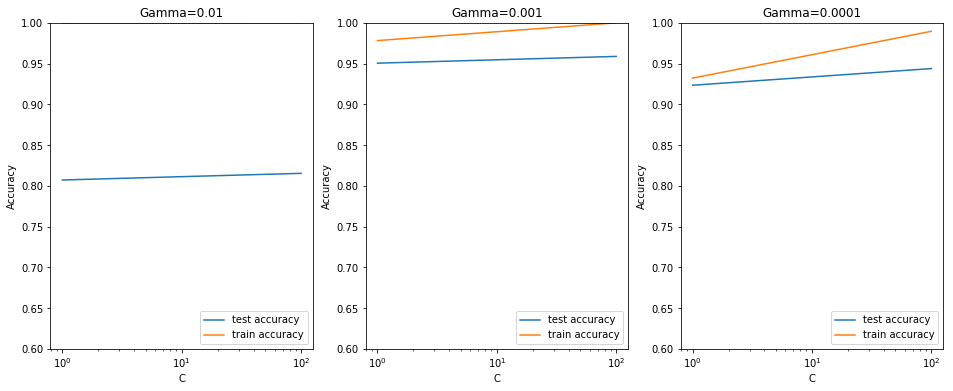

In [46]:
#converting C to numeric type for plotting on x-axis
cv_results['param_C'] =cv_results['param_C'].astype('int')

#plotting
plt.figure(figsize=(16,6))

#subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"],gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"],gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'],loc='lower right')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001["mean_test_score"])
plt.plot(gamma_001['param_C'],gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'],loc='lower right')
plt.xscale('log')

#subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001["mean_test_score"])
plt.plot(gamma_0001['param_C'],gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'],loc='lower right')
plt.xscale('log')

plt.show()

In [47]:
gamma_01

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,654.593774,3.713241,145.327312,4.165774,1,0.01,"{'C': 1.1, 'gamma': 0.01}",0.803958,0.804858,0.813004,0.807272,0.004069,6,0.999796,0.999796,0.999643,0.999745,0.000072
3,609.091505,5.985864,139.808330,0.544375,100,0.01,"{'C': 100, 'gamma': 0.01}",0.811914,0.811798,0.822599,0.815436,0.005064,5,1.000000,1.000000,1.000000,1.000000,0.000000


# Final Model

In [48]:
#optimal hyperparameters
best_C =1
best_gamma =0.001

#model
svm_final=svm.SVC(kernel='rbf',C=best_C, gamma=best_gamma)

#fit
svm_final.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
#predictions
predictions = svm_final.predict(x_test)

#confusion matrix
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=predictions)

#measure accuracy
test_accuracy= metrics.accuracy_score(y_true=y_test,y_pred=predictions)

#print cm and test_accuracy results
print(test_accuracy,'\n')
print(confusion)

0.9551622887072455 

[[1222    0    7    2    2    2    5    0    2    0]
 [   0 1396   14    4    2    1    0    3    4    1]
 [   7    3 1144    6    9    2    2    8   14    4]
 [   1    3   24 1226    1   14    3    5   13    6]
 [   0    3   15    0 1141    1    8    5    3   28]
 [   1    3   12   18    2 1117   14    3    5    3]
 [   5    1   10    0    3    3 1226    0    2    0]
 [   1    9   28    0    7    0    0 1217    1   21]
 [   4   12   11   18    8   11    7    3 1155    7]
 [   4    3    7   12   23    2    1   34    9 1192]]


In [50]:
result_df = pd.DataFrame({'Label': predictions })
result_df.index+=1
result_df = result_df.reindex(result_df.index.rename('ImageId'))

#Save the output in result.csv
result_df.to_csv('results.csv', header=True)

#print result
result_df

,Label
ImageId,
1,5
2,0
3,2
4,4
5,7
6,9
7,4
8,3
9,5
